In [69]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
import os
file_list = os.listdir('./training_data_new')

In [6]:
file_list

['0.csv',
 '1.csv',
 '10.csv',
 '100.csv',
 '1000.csv',
 '10000.csv',
 '10001.csv',
 '10002.csv',
 '10003.csv',
 '10004.csv',
 '10005.csv',
 '10006.csv',
 '10007.csv',
 '10008.csv',
 '10009.csv',
 '1001.csv',
 '10010.csv',
 '10011.csv',
 '10012.csv',
 '10013.csv',
 '10014.csv',
 '10015.csv',
 '10016.csv',
 '10017.csv',
 '10018.csv',
 '10019.csv',
 '1002.csv',
 '10020.csv',
 '10021.csv',
 '10022.csv',
 '10023.csv',
 '10024.csv',
 '10025.csv',
 '10026.csv',
 '10027.csv',
 '10028.csv',
 '10029.csv',
 '1003.csv',
 '10030.csv',
 '10031.csv',
 '10032.csv',
 '10033.csv',
 '10034.csv',
 '10035.csv',
 '10036.csv',
 '10037.csv',
 '10038.csv',
 '10039.csv',
 '1004.csv',
 '10040.csv',
 '10041.csv',
 '10042.csv',
 '10043.csv',
 '10044.csv',
 '10045.csv',
 '10046.csv',
 '10047.csv',
 '10048.csv',
 '10049.csv',
 '1005.csv',
 '10050.csv',
 '10051.csv',
 '10052.csv',
 '10053.csv',
 '10054.csv',
 '10055.csv',
 '10056.csv',
 '10057.csv',
 '10058.csv',
 '10059.csv',
 '1006.csv',
 '10060.csv',
 '10061.csv'

In [7]:
len(file_list)

9400

In [11]:
file = pd.read_csv("./training_data_new/"+file_list[0])

In [20]:
file

,Local_X,Local_Y,v_Vel,v_Acc,Space_Headway,dis_cen,i_l,i_r,i_f,dis_l,dis_r,dis_f
0,16.884,48.213,12.50,0.0,0.0,0.162019,0,0,0,99.000,99.0,99.0
1,16.938,49.463,12.50,0.0,0.0,0.108019,0,0,0,99.000,99.0,99.0
2,16.991,50.712,12.50,0.0,0.0,0.055019,0,0,0,99.000,99.0,99.0
3,17.045,51.963,12.50,0.0,0.0,0.001019,0,0,0,99.000,99.0,99.0
4,17.098,53.213,12.50,0.0,0.0,0.051981,0,0,0,99.000,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62,17.247,118.637,3.67,0.0,0.0,0.200981,0,0,0,99.000,99.0,99.0
63,17.231,119.004,3.67,0.0,0.0,0.184981,1,0,0,13.105,99.0,99.0
64,17.214,119.370,3.67,0.0,0.0,0.167981,1,0,0,13.022,99.0,99.0
65,17.199,119.737,3.67,0.0,0.0,0.152981,1,0,0,12.930,99.0,99.0


In [66]:
file.to_numpy().shape


(67, 12)

In [25]:
file.to_numpy()[62:,:2]

array([[ 17.247, 118.637],
       [ 17.231, 119.004],
       [ 17.214, 119.37 ],
       [ 17.199, 119.737],
       [ 17.182, 120.104]])

In [34]:
def create_dataset_train(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000, variable_index = 0):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [105]:
def min_max_scaling(dataset, scaler=False):
    reshaped_dataset = dataset.reshape(dataset.shape[0]*dataset.shape[1], dataset.shape[2])
    scaler = scaler
    if scaler==False:
        scaler = MinMaxScaler()
        reshaped_dataset = scaler.fit_transform(reshaped_dataset)
    else:
        scaler = scaler
        reshaped_dataset = scaler.transform(reshaped_dataset)
    reshaped_dataset = reshaped_dataset.reshape(dataset.shape[0],dataset.shape[1], dataset.shape[2])    
    return reshaped_dataset, scaler

In [49]:
def create_dataset_valid(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000, variable_index = 0):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [51]:
def create_dataset_test(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400, variable_index = 0):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [18]:
# variable definition
predict_steps = 5
time_steps = file.to_numpy().shape[0] - predict_steps
number_of_variables = file.to_numpy().shape[1]

In [94]:
X_xtrain, y_xtrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xvalid, y_xvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xtest, y_xtest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)

In [98]:
min_max_scaling(X_xtrain).shape

(7000, 62, 12)

In [85]:
X_xtrain.shape

(7000, 62, 12)

In [38]:
y_xtrain.shape

(7000, 5)

In [43]:
X_xvalid.shape

(1000, 62, 12)

In [45]:
y_xvalid.shape

(62, 5)

In [53]:
model_x = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_x = model_x.fit(X_xtrain, y_xtrain, epochs=10, validation_data=(X_xvalid, y_xvalid))

Epoch 1/10
219/219 [==============================] - 14s 47ms/step - loss: 1231.5212 - val_loss: 759.5724
Epoch 2/10
219/219 [==============================] - 9s 41ms/step - loss: 649.1446 - val_loss: 505.8592
Epoch 3/10
219/219 [==============================] - 10s 45ms/step - loss: 446.6352 - val_loss: 368.8355
Epoch 4/10
219/219 [==============================] - 11s 51ms/step - loss: 323.6619 - val_loss: 197.5786
Epoch 5/10
219/219 [==============================] - 11s 51ms/step - loss: 165.0833 - val_loss: 110.8863
Epoch 6/10
219/219 [==============================] - 12s 55ms/step - loss: 210.2171 - val_loss: 229.4076
Epoch 7/10
219/219 [==============================] - 11s 52ms/step - loss: 114.6072 - val_loss: 77.4833
Epoch 8/10
219/219 [==============================] - 12s 56ms/step - loss: 86.2015 - val_loss: 75.8470
Epoch 9/10
219/219 [==============================] - 10s 46ms/step - loss: 64.3407 - val_loss: 45.0799
Epoch 10/10
219/219 [==============================

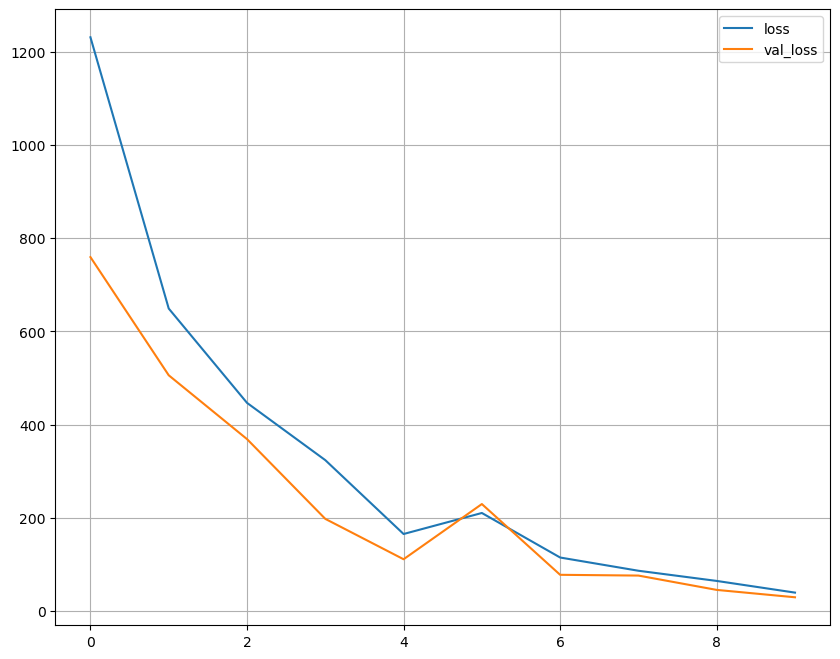

In [60]:
pd.DataFrame(history_x.history).plot(figsize=(10,8))
plt.grid(True)

In [61]:
model_x.evaluate(X_xtest, y_xtest)

44/44 [==============================] - 1s 19ms/step - loss: 39.1437


39.14368438720703

In [106]:
X_ytrain, y_ytrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_train_scaled, scaler = min_max_scaling(X_ytrain)
X_yvalid, y_yvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_yvalid_scaled,_ = min_max_scaling(X_yvalid, scaler)
X_ytest, y_ytest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_ytest_scaled,_ = min_max_scaling(X_yvalid, scaler)

In [64]:
model_y = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y = model_y.fit(X_ytrain, y_ytrain, epochs=10, validation_data=(X_yvalid, y_yvalid))

Epoch 1/10
219/219 [==============================] - 14s 46ms/step - loss: 958331.0000 - mse: 958331.0000 - val_loss: 984093.5000 - val_mse: 984093.5000
Epoch 2/10
219/219 [==============================] - 9s 43ms/step - loss: 928719.5625 - mse: 928719.5625 - val_loss: 955565.1250 - val_mse: 955565.1250
Epoch 3/10
219/219 [==============================] - 10s 44ms/step - loss: 901767.1875 - mse: 901767.1875 - val_loss: 928268.8125 - val_mse: 928268.8125
Epoch 4/10
219/219 [==============================] - 10s 44ms/step - loss: 875790.6875 - mse: 875790.6875 - val_loss: 901835.2500 - val_mse: 901835.2500
Epoch 5/10
219/219 [==============================] - 11s 49ms/step - loss: 850577.7500 - mse: 850577.7500 - val_loss: 876179.8125 - val_mse: 876179.8125
Epoch 6/10
219/219 [==============================] - 12s 53ms/step - loss: 826038.2500 - mse: 826038.2500 - val_loss: 851091.5000 - val_mse: 851091.5000
Epoch 7/10
219/219 [==============================] - 10s 48ms/step - loss: 8

In [110]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y_scaled.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y_scaled = model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=40, validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/40
219/219 [==============================] - 22s 59ms/step - loss: 957184.5625 - mse: 957184.5625 - val_loss: 983106.9375 - val_mse: 983106.9375
Epoch 2/40
219/219 [==============================] - 11s 49ms/step - loss: 927906.6875 - mse: 927906.6875 - val_loss: 954839.6875 - val_mse: 954839.6875
Epoch 3/40
219/219 [==============================] - 10s 47ms/step - loss: 901093.2500 - mse: 901093.2500 - val_loss: 927628.2500 - val_mse: 927628.2500
Epoch 4/40
219/219 [==============================] - 10s 47ms/step - loss: 875164.6250 - mse: 875164.6250 - val_loss: 901275.4375 - val_mse: 901275.4375
Epoch 5/40
219/219 [==============================] - 10s 46ms/step - loss: 850009.5000 - mse: 850009.5000 - val_loss: 875592.7500 - val_mse: 875592.7500
Epoch 6/40
219/219 [==============================] - 10s 47ms/step - loss: 825535.3125 - mse: 825535.3125 - val_loss: 850579.2500 - val_mse: 850579.2500
Epoch 7/40
219/219 [==============================] - 10s 48ms/step - loss: 

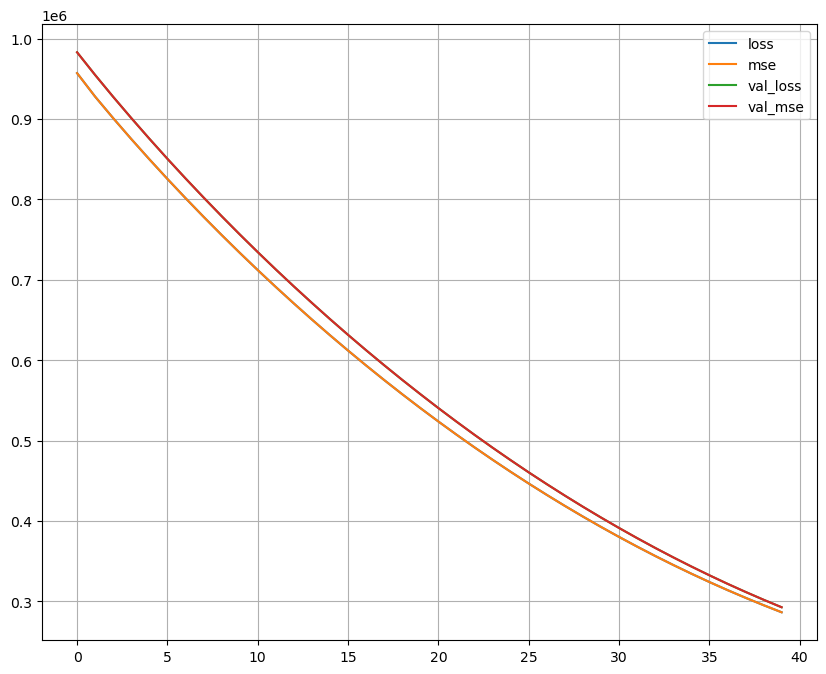

In [111]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

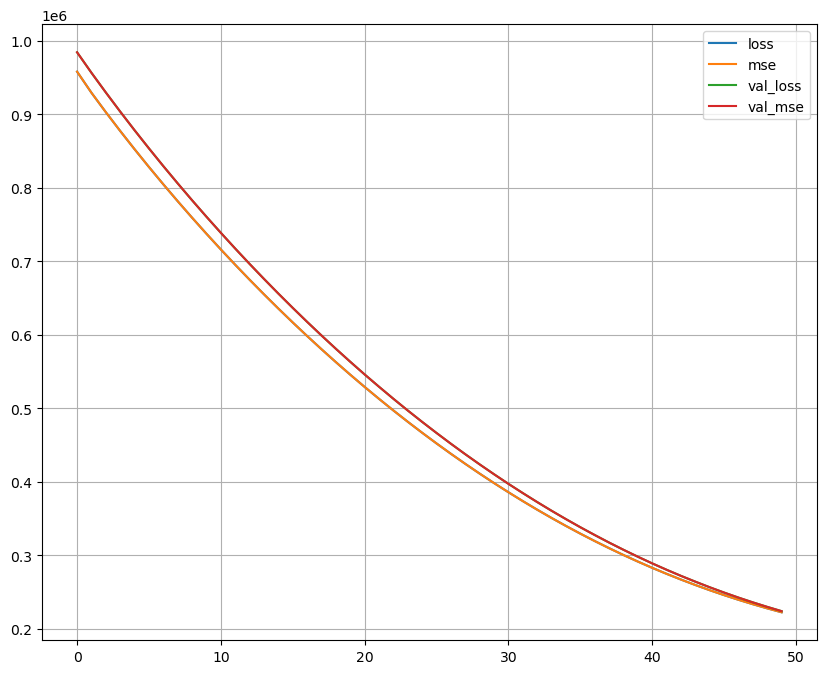

In [113]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

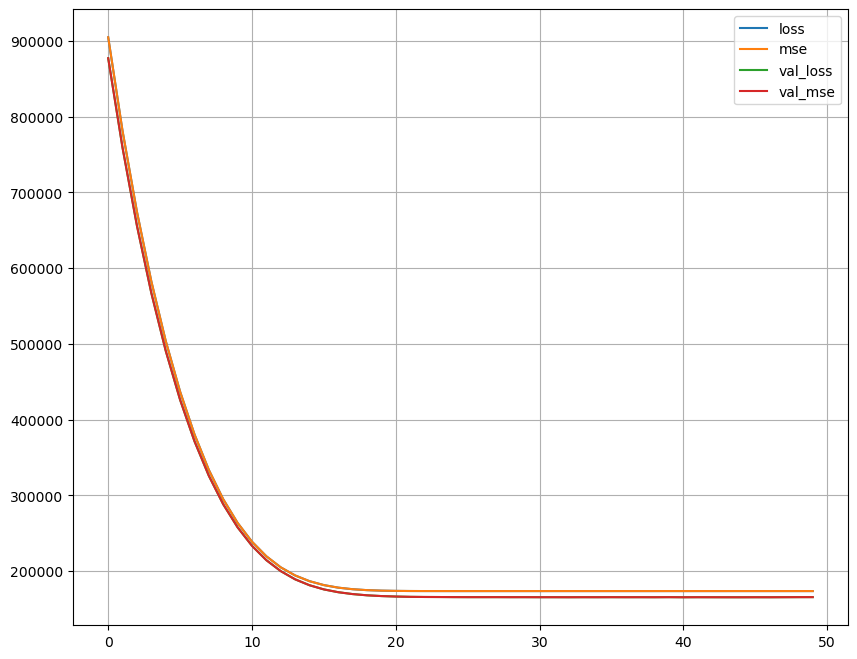

In [121]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

In [156]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=100, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y_scaled.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.005), loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y_scaled = model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=25 , validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/25
149/219 [===================>..........] - ETA: 3s - loss: 918081.6875 - mse: 918081.6875

KeyboardInterrupt: 

In [171]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(5, activation='linear')
])

In [162]:
model_y_scaled.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 62, 30)            5160      
                                                                 
 lstm_59 (LSTM)              (None, 62, 30)            7320      
                                                                 
 lstm_60 (LSTM)              (None, 30)                7320      
                                                                 
 dense_33 (Dense)            (None, 5)                 155       
                                                                 
Total params: 19955 (77.95 KB)
Trainable params: 19955 (77.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:

model_y_scaled.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y_scaled = model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=25 , validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/25
219/219 [==============================] - 67s 283ms/step - loss: 968283.0625 - mse: 968283.0625 - val_loss: 1004156.6875 - val_mse: 1004156.6875
Epoch 2/25
174/219 [======================>.......] - ETA: 13s - loss: 951326.4375 - mse: 951326.4375

KeyboardInterrupt: 

In [170]:
model_y_scaled.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y= model_y_scaled.fit(X_ytrain, y_ytrain, epochs=25 , validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 54s 232ms/step - loss: 895843.3125 - mse: 895843.3125 - val_loss: 851002.6875 - val_mse: 851002.6875
Epoch 2/25
219/219 [==============================] - 49s 222ms/step - loss: 744156.2500 - mse: 744156.2500 - val_loss: 711103.9375 - val_mse: 711103.9375
Epoch 3/25
219/219 [==============================] - 48s 220ms/step - loss: 623300.1250 - mse: 623300.1250 - val_loss: 597250.3750 - val_mse: 597250.3750
Epoch 4/25
219/219 [==============================] - 55s 253ms/step - loss: 522677.8750 - mse: 522677.8750 - val_loss: 501732.5312 - val_mse: 501732.5312
Epoch 5/25
219/219 [==============================] - 51s 234ms/step - loss: 438202.8750 - mse: 438202.8750 - val_loss: 420465.4688 - val_mse: 420465.4688
Epoch 6/25
219/219 [==============================] - 56s 256ms/step - loss: 366512.6875 - mse: 366512.6875 - val_loss: 351432.9062 - val_mse: 351432.9062
Epoch 7/25
219/219 [==============================] - 55s 251ms/step -

In [116]:
223771**0.5

473.04439537954573

In [122]:
model_y_scaled.predict(X_xtest)

44/44 [==============================] - 2s 20ms/step


array([[890.1131 , 892.7307 , 895.0795 , 897.4254 , 899.778  ],
       [890.13403, 892.7527 , 895.1014 , 897.44666, 899.8002 ],
       [877.14655, 880.0303 , 882.1706 , 884.4464 , 886.69836],
       ...,
       [890.25507, 892.8723 , 895.2219 , 897.5685 , 899.9207 ],
       [890.1635 , 892.7829 , 895.13116, 897.47644, 899.8304 ],
       [890.13007, 892.7476 , 895.09674, 897.44257, 899.7948 ]],
      dtype=float32)

In [123]:
y_ytest

array([[1065.401, 1068.72 , 1072.035, 1075.34 , 1078.643],
       [1240.67 , 1242.67 , 1244.674, 1246.678, 1248.673],
       [1482.324, 1484.899, 1487.462, 1490.011, 1492.549],
       ...,
       [1012.551, 1015.547, 1018.523, 1021.491, 1024.466],
       [1226.385, 1229.495, 1232.635, 1235.812, 1239.032],
       [1469.081, 1472.658, 1476.204, 1479.739, 1483.22 ]])

In [124]:
y_ytrain

array([[ 118.637,  119.004,  119.37 ,  119.737,  120.104],
       [ 158.996,  159.872,  160.746,  161.615,  162.481],
       [1257.448, 1259.772, 1262.092, 1264.399, 1266.709],
       ...,
       [ 739.816,  740.933,  742.049,  743.166,  744.282],
       [ 857.561,  859.843,  862.137,  864.449,  866.774],
       [ 998.474, 1000.257, 1001.978, 1003.708, 1005.578]])